<a href="https://colab.research.google.com/github/gayza-cyber17/studying-Git/blob/main/T_bank_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik
from phik import phik_matrix

In [ ]:
df = pd.read_csv(r'C:\Users\ilybu\AppData\Local\Temp\3875ce12-70f2-402b-9826-c50f13a069bd_invest_db.rar.9bd\invest_db.csv', sep=';', parse_dates=['date', 'invest_utilization_dt'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        458370 non-null  int64         
 1   date                      458370 non-null  datetime64[ns]
 2   age                       458370 non-null  int64         
 3   education_level_cd        233460 non-null  object        
 4   marital_status_cd         267030 non-null  object        
 5   children_cnt              410310 non-null  object        
 6   monthly_income_amt        355140 non-null  object        
 7   invest_utilization_dt     458370 non-null  datetime64[ns]
 8   forts_flg                 458370 non-null  int64         
 9   margin_status_flg         458370 non-null  int64         
 10  qualified_investor_flg    458370 non-null  int64         
 11  in_payment_rub_amt        458370 non-null  object        
 12  ou

In [ ]:
# Кол-во пропусков в каждом столбце
df.isna().sum()

id                               0
date                             0
age                              0
education_level_cd          224910
marital_status_cd           191340
children_cnt                 48060
monthly_income_amt          103230
invest_utilization_dt            0
forts_flg                        0
margin_status_flg                0
qualified_investor_flg           0
in_payment_rub_amt               0
out_payment_rub_amt              0
uncovered_position_amt           0
turnover_rus_bon_amt             0
turnover_rus_sec_amt             0
turnover_forts_amt               0
turnover_cur_amt                 0
turnover_etf_amt                 0
turnover_fnd_amt                 0
turnover_opt_amt                 0
turnover_ore_prc_amt             0
turnover_ore_sel_amt             0
turnover_tracking_amt            0
trade_order_rus_sec_cnt          0
trade_order_rus_bon_cnt          0
trade_order_forts_cnt            0
trade_order_cur_cnt              0
trade_order_etf_cnt 

In [ ]:
# Доля пропусков в каждом столбце
df.isna().sum() / df.shape[0] * 100

id                           0.000000
date                         0.000000
age                          0.000000
education_level_cd          49.067347
marital_status_cd           41.743570
children_cnt                10.484979
monthly_income_amt          22.521107
invest_utilization_dt        0.000000
forts_flg                    0.000000
margin_status_flg            0.000000
qualified_investor_flg       0.000000
in_payment_rub_amt           0.000000
out_payment_rub_amt          0.000000
uncovered_position_amt       0.000000
turnover_rus_bon_amt         0.000000
turnover_rus_sec_amt         0.000000
turnover_forts_amt           0.000000
turnover_cur_amt             0.000000
turnover_etf_amt             0.000000
turnover_fnd_amt             0.000000
turnover_opt_amt             0.000000
turnover_ore_prc_amt         0.000000
turnover_ore_sel_amt         0.000000
turnover_tracking_amt        0.000000
trade_order_rus_sec_cnt      0.000000
trade_order_rus_bon_cnt      0.000000
trade_order_

In [ ]:
# Переводим в нужный тип
df.monthly_income_amt = df.monthly_income_amt.str.replace(',', '.').astype('float64')

In [ ]:
# Инф-ия по столбцу размера месячного дохода
df.monthly_income_amt.describe()

count    355140.000000
mean       4511.029242
std        6157.620522
min           0.000000
25%        1722.000000
50%        3143.000000
75%        5025.000000
max      156294.000000
Name: monthly_income_amt, dtype: float64

In [ ]:
# Кол-во клиентов по месячному доходу по уровню образовния
df.groupby('education_level_cd')['monthly_income_amt'].count()

education_level_cd
ACD      2610
GRD    138240
MGR         0
PGR      8550
SCH     45000
UGR     30780
Name: monthly_income_amt, dtype: int64

In [ ]:
# Преобразование в нужный тип данных
df.cor_balance_amt = df.cor_balance_amt.str.replace(',','.').astype('float64')

In [ ]:
df.ccr_balance_amt = df.ccr_balance_amt.str.replace(',','.').astype('float64')

In [ ]:
value_money_investment = df.groupby('education_level_cd')['cor_balance_amt'].sum()

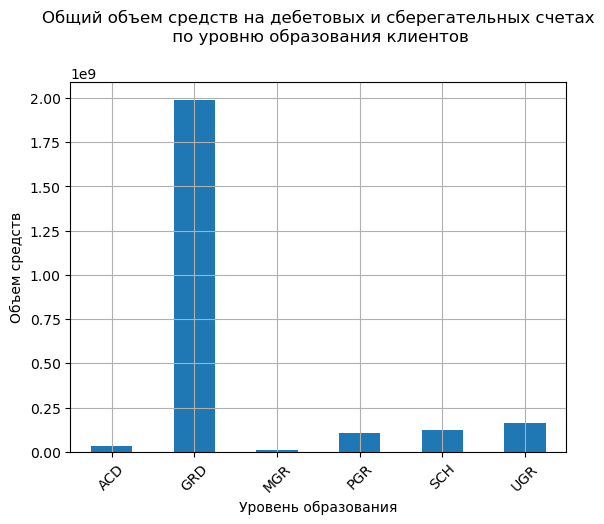

In [ ]:
# ГРафик средств на дебетовых и сберегательных счетах по уровню образования клиентов
value_money_investment.plot(kind='bar', grid = True)
plt.title('Общий объем средств на дебетовых и сберегательных счетах\n по уровню образования клиентов\n')
plt.xlabel('Уровень образования')
plt.ylabel('Объем средств')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Количество клиентов с кредитными средствами по уровню образования
df.groupby('education_level_cd')['ccr_balance_amt'].count()

education_level_cd
ACD      2340
GRD    122084
MGR         0
PGR      7780
SCH     38067
UGR     26051
Name: ccr_balance_amt, dtype: int64

In [ ]:
#Количество клиентов со средствами на дебетовых и сберегательных счетах по уровню образования
df.groupby('education_level_cd')['cor_balance_amt'].count()

education_level_cd
ACD      2880
GRD    142898
MGR        90
PGR      8730
SCH     46980
UGR     31500
Name: cor_balance_amt, dtype: int64

In [ ]:
value_credit_money_investment = df.groupby('education_level_cd')['ccr_balance_amt'].sum()

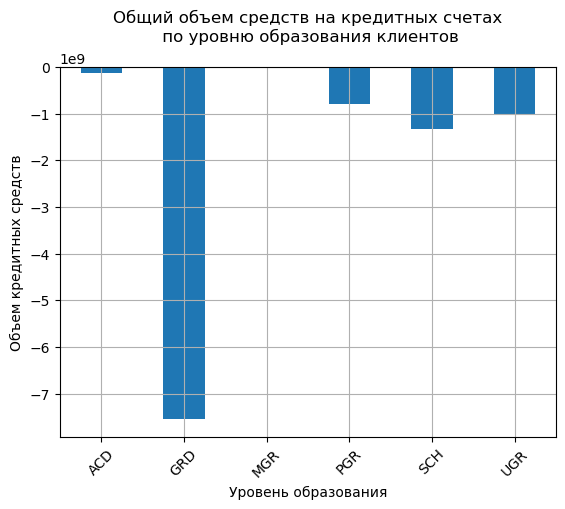

In [ ]:
# График кредитных стредств по уровню образования
value_credit_money_investment.plot(kind='bar', grid = True)
plt.title('Общий объем средств на кредитных счетах\n по уровню образования клиентов\n')
plt.xlabel('Уровень образования')
plt.ylabel('Объем кредитных средств')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Сумма кредитных средств по семейному положению
credits_sp = df.groupby('marital_status_cd')['ccr_balance_amt'].sum()

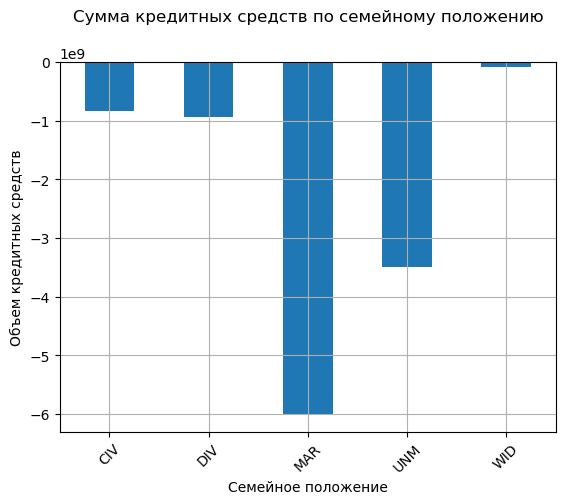

In [ ]:
credits_sp.plot(kind='bar', grid = True)
plt.title('Сумма кредитных средств по семейному положению\n')
plt.xlabel('Семейное положение')
plt.ylabel('Объем кредитных средств')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Кол-во клиентов по семейному положению, которые пользуются крдитными средствами
df.groupby('marital_status_cd')['ccr_balance_amt'].count()

marital_status_cd
CIV     16084
DIV     16159
MAR    107118
UNM     76447
WID      1350
Name: ccr_balance_amt, dtype: int64

In [ ]:
# Сумма средств клиентов по семейному положению
no_credits_sp = df.groupby('marital_status_cd')['cor_balance_amt'].sum()

In [ ]:
# Кол-во клиентов по семейному положению, которые имеют свои средства на дебетовых и сберегательных счетах
df.groupby('marital_status_cd')['cor_balance_amt'].count()

marital_status_cd
CIV     20610
DIV     19948
MAR    129550
UNM     94371
WID      1890
Name: cor_balance_amt, dtype: int64

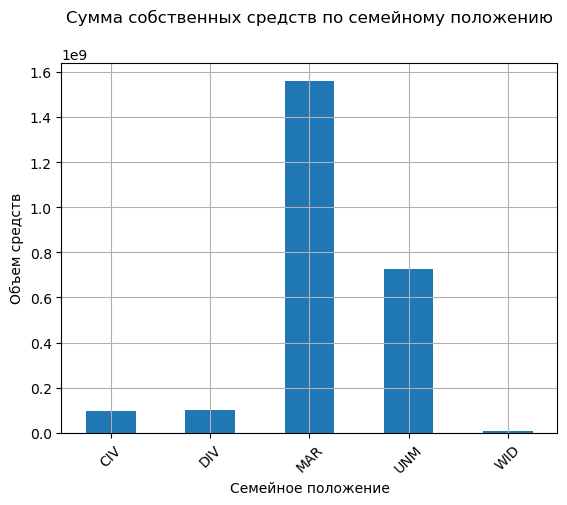

In [ ]:
no_credits_sp.plot(kind='bar', grid = True)
plt.title('Сумма собственных средств по семейному положению\n')
plt.xlabel('Семейное положение')
plt.ylabel('Объем средств')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.children_cnt = df.children_cnt.str.replace(',','.').astype('float')

In [ ]:
# Нахожу кол-во юзеров по кол-ву детей
count_ch_users = df.groupby('children_cnt')['id'].count()

In [ ]:
df.portf_total_amt = df.portf_total_amt.str.replace(',','.').astype('float')

In [ ]:
# Нахожу средний размер портфеля клиентов с разынм кол-ом детей
mean_profit_ch = df.groupby('children_cnt')['portf_total_amt'].mean()

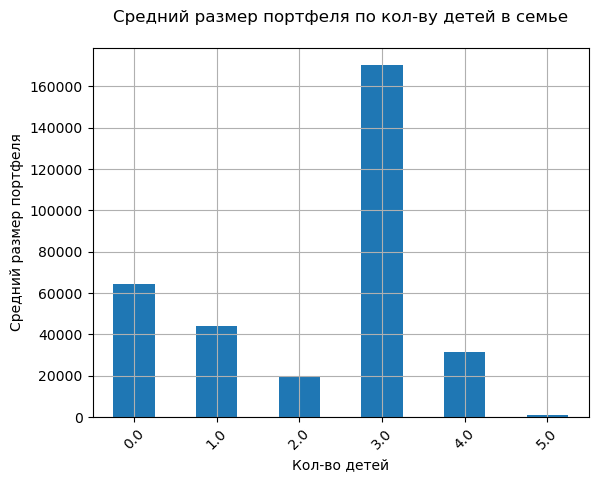

In [ ]:
mean_profit_ch.plot(kind='bar', grid = True)
plt.title('Средний размер портфеля по кол-ву детей в семье\n')
plt.xlabel('Кол-во детей')
plt.ylabel('Средний размер портфеля')
plt.xticks(rotation=45)
plt.show()

**Промежуточный вывод:**

Загрузив данных мы увидели, что во многих столбцах нужно менять тип данных. Заметили, что в данных есть пропуски, с ними пока что ничего не делали.
Заметили, что большинство людей, которые пользуются Т-инвестициями - это люди с высшим образованием. И в данных появился еще один вид урвоня образования клиента - это `MGR`, в описании про этот вид ничего не сказано.

Наибольшее кол-во людей, которые пользуются иинвестициями - это женатые люди, после идут холостые.

Интересное наблюдение, что средний размер портфеля выше всего у пользователей с 3 детьми (свыше 160 тыс.руб.) и меньше всего с 5-ю детьми (менее 10 тыс.руб).

In [ ]:
columns_to_convert = [
    'portf_total_amt',
    'lon_balance_amt',
    'trade_order_rus_sec_cnt',
    'trade_order_forts_cnt',
    'uncovered_position_amt',
    'trade_order_fnd_cnt',
    'trade_order_opt_cnt',
    'portf_ore_amt',
    'out_payment_rub_amt',
    'in_payment_rub_amt'
]

for column in columns_to_convert:
    df[column] = df[column].astype('str').str.replace(',', '.').astype('float64', errors='ignore')

In [ ]:
# Нахожу корреляцию между числовыми значениями столбцов с помощью метода Спирмена
correlation = df[['portf_total_amt',
    'lon_balance_amt',
    'trade_order_rus_sec_cnt',
    'trade_order_forts_cnt',
    'uncovered_position_amt',
    'trade_order_fnd_cnt',
    'trade_order_opt_cnt',
    'portf_ore_amt',
    'out_payment_rub_amt',
    'in_payment_rub_amt',
     'monthly_income_amt', 'age','ccr_balance_amt', 'cor_balance_amt']].corr(method = 'spearman')

<Axes: >

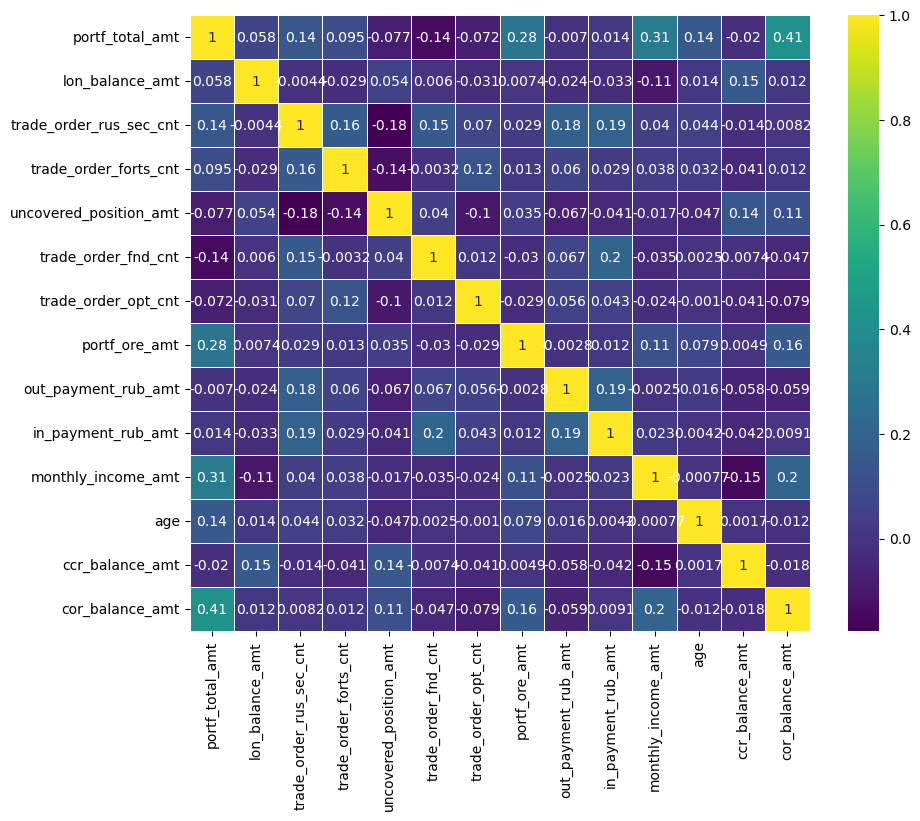

In [ ]:
# Строю тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(data = correlation, annot = True, fmt='.2g', linewidths = 0.5, cmap='viridis')

Исходя из графика выше мы видим,что на общий портфель клиента влияет его месячный доход, деньги на дебетовых картах и сберегательных счетах и самую малось - объем драгоценных металлов в портфеле. В меньшей степени на общий портфель влияет кол-во сделов с фондами Тинькофф капитала и непокрытая позиция в портфеле.

In [ ]:
# Нахожу топ-10 клиентов с самым большим портфелями ( в руб)
top_ten_rich_people = df.groupby('id').agg({'portf_total_amt' : 'sum'}).reset_index()\
    .rename(columns = {'portf_total_amt' : 'total_money_on_one_user'})\
    .sort_values('total_money_on_one_user', ascending = False).head(10)

In [ ]:
# Нахожу топ-10 клиентов с наименьшими портфелями ( в руб)
top_ten_poor_people = df.groupby('id').agg({'portf_total_amt' : 'sum'}).reset_index()\
    .rename(columns = {'portf_total_amt' : 'total_money_on_one_user'})\
    .sort_values('total_money_on_one_user', ascending = True).head(10)

In [ ]:
top_ten_poor_people

,id,total_money_on_one_user
291,118550890,-422081.0
3149,1315473834,-13257.0
90,34997776,-1050.0
1822,760652001,408.0
4566,1907601062,481.0
841,341932378,678.0
2710,1121773294,898.0
5021,2115881249,938.0
3146,1314191949,1023.0
4306,1802511168,1072.0


Видим, что есть клиенты с отрицательным балансом, а у одного из этих клиентов минус свыше 400 тыс.руб.

In [ ]:
#
df[['forts_flg', 'margin_status_flg', 'qualified_investor_flg']] = df[['forts_flg', 'margin_status_flg', 'qualified_investor_flg']].astype('int16')

In [ ]:
#
cols_to_convert = ['posts', 'comments', 'reacts', 'reads']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.str.replace(',', '.').astype('float64'))

In [ ]:
# кол-во людей с флагом подключения срочного рынка
df.forts_flg.sum()

242939

In [ ]:
# Кол-во людей у которых подключена маржинальная торговля
df.margin_status_flg.sum()

147869

In [ ]:
# Кол-во людей со статусом квал.инветсора
df.qualified_investor_flg.sum()

131459

Видми, что не так много людей имеют статус квалифицированного инвестора.

In [ ]:
importanr_users = df[(df['forts_flg'] == 1) & (df['margin_status_flg'] == 1) & (df['qualified_investor_flg'] == 1)]

In [ ]:
# Кол-во юзеров, которые имеют статус квал.инвестора , у которых подключена маржинальная торговля и есть флаг подключения срочного рынка
importanr_users['id'].count()

81315

In [ ]:
df.head()

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
0,1479787897,2024-04-20,33,NaN,UNM,0.0,31272.0,2023-09-13,1,0,...,"428,0","0,0",0.0,-11298.0,541.0,0.0,0.0,0.0,0.0,0.0
1,601760063,2024-02-01,29,GRD,UNM,0.0,6284.0,2021-03-29,0,0,...,"23,0","0,0",0.0,NaN,8115.0,0.0,0.0,0.0,0.0,0.0
2,61175329,2024-02-10,38,SCH,MAR,0.0,1904.0,2023-12-05,1,0,...,"193,0","0,0",0.0,0.0,25.0,NaN,0.0,0.0,0.0,2.0
3,1411700618,2024-03-05,64,NaN,NaN,0.0,NaN,2021-09-16,0,0,...,"0,0","0,0",0.0,NaN,65.0,NaN,0.0,0.0,0.0,0.0
4,2096755145,2024-02-10,31,NaN,UNM,0.0,NaN,2022-03-01,0,0,...,"0,0","0,0",0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [ ]:
# Оставляю юзеров, которые пишут посты
posts_df = df[df['posts'] > 0.0]

In [ ]:
# Нахожу объем средств у юзеров , которые пишут посты
money_posts_users = posts_df.groupby('id')['portf_total_amt'].sum().reset_index()

In [ ]:
money_posts_users['portf_total_amt'].describe()

count    5.330000e+02
mean     5.433187e+05
std      4.483061e+06
min     -1.736400e+04
25%      8.594000e+03
50%      3.565700e+04
75%      1.385280e+05
max      9.392594e+07
Name: portf_total_amt, dtype: float64

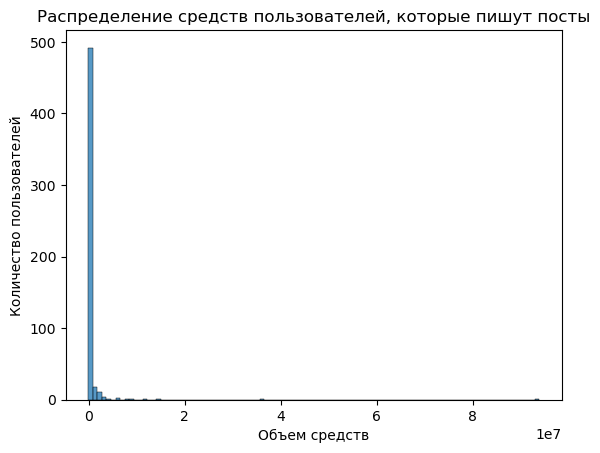

In [ ]:
# Строю гистограмму распредления средств
sns.histplot(data=money_posts_users, x='portf_total_amt', bins=100, kde=False)
plt.title('Распределение средств пользователей, которые пишут посты')
plt.xlabel('Объем средств')
plt.ylabel('Количество пользователей')
plt.show()

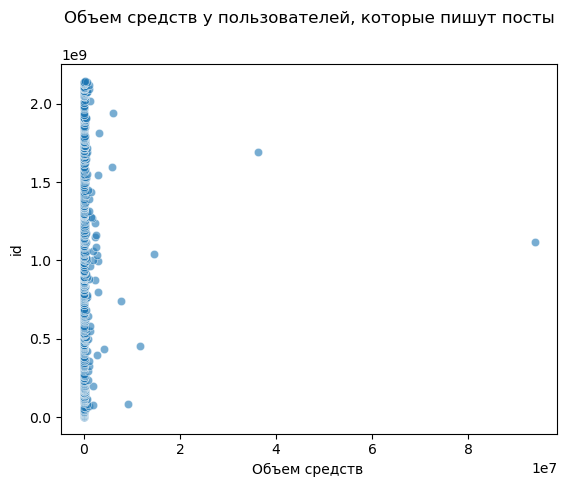

In [ ]:
# Строю диаграмму рассеивания объема срдеств пользоватеелй , которые пишут посты
sns.scatterplot(data=money_posts_users, x='portf_total_amt', y='id', alpha=0.6)
plt.title('Объем средств у пользователей, которые пишут посты\n')
plt.xlabel('Объем средств ')
#plt.ylabel('Идентификатор пользователя')
plt.show()

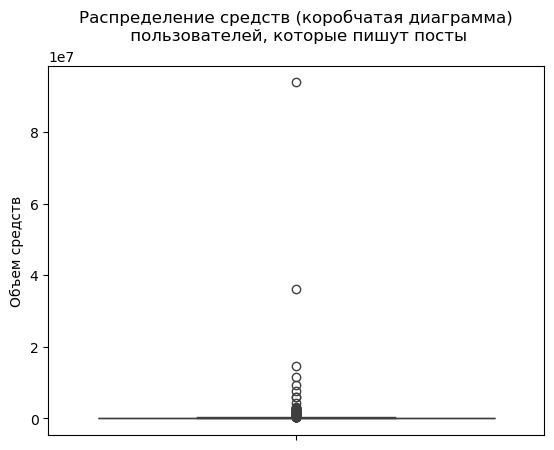

In [ ]:
# Ящик с усами ,показывающий объем срдеств у юзеров, котрые пишут посты
sns.boxplot(data=money_posts_users, y='portf_total_amt')
plt.title('Распределение средств (коробчатая диаграмма)\n пользователей, которые пишут посты\n ')
plt.ylabel('Объем средств')
plt.show()

**Промежуточный вывод:**

Исходя из графиков выше, мы видим, что у пользователей , которые пишут посты в Пульсе баланс в портфелях зачастую не превышает и 36 тыс.руб, также есть пользователи с отрицательным балансом. Можно сделать вывод, что пользователям нужно аккуратнее относится к советам и сделкам пользователей, которые публикуют посты в Пульс.

In [ ]:
! pwd

"pwd" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
import os
print(os.getcwd())

C:\Users\ilybu


**Примеры гипотез:**

1. Пользователи у которых нет детей размер портфеля больше, чем у пользователей у которых дети есть.

2. Пользователи у которых высшее образование реже пользуются заемными средствами, чем те у кого высшего образования нет.

3. Число написанных постов на прямую влияет на общий портфель клиента.